# LE2 & LE4 – Dokumentation (Ameisenmodell, BPTK-Py)

> Hinweis: Die ausführlichen **Systemgrenzen** sind bereits in `systemgrenzen_ameisen.md` dokumentiert (siehe Repo).  
> Unten werden sie nur **kurz** zusammengefasst und dort ergänzt, wo LE4 “Interventionen/Szenarien” explizit verlangt.

---

## LE2 – Modellbeschreibung (Problem, Systemgrenzen, Struktur, Parameter)

### 1) Problemstellung + geeignete Kenngrössen (KPIs) + Szenarienbedarf
**Problemstellung:**  
Wie entwickeln sich **einheimische Ameisen** unter dem Einfluss von **Erderwärmung** (exogen) und **invasiven Ameisen** (Konkurrenz/Unterdrückung) über einen Zeithorizont von 20 Jahren?

**KPIs / Kenngrössen:**  
- `Ameisen` (einheimische Kolonien / Index)
- `Invasive Ameisen` (invasive Kolonien / Index)
- `Habitatsqualität` (Index 0–100)
- `Ressourcen` (Index 0–100)

**Braucht es Szenarien?**  
Ja – weil der wichtigste Treiber (**Erwärmungsrate**) unsicher ist und weil LE4 zudem **Handlungsoptionen** (Interventionen) verlangt.

---

### 2) Systemgrenzen + Behandlung der Umgebung (kurz)
**Raum:** ein lokales Wald-/Saumbiotop als *ein Patch* (keine explizite räumliche Struktur, keine Migration).  
**Zeit:** 20 Jahre, `dt=0.25` Jahre.  
**Exogen (Umgebung):** `Erderwärmung` + `Erhöhung pro Jahr` als exogener Trend (keine Rückkopplung vom System aufs Klima).

**Ausserhalb (nicht explizit modelliert):** Landnutzung, Prädatoren, detaillierte Nahrungsnetze, räumliche Ausbreitung etc.  
**Wichtig:** “Management” ist **nicht** Teil der Baseline-Ökologie, wird aber in LE4 als **exogenes Szenario/Intervention** abgebildet (siehe unten).

---

### 3) Stocks & Flows (welche und wofür?)
**Stocks (Bestände):**
- `Ameisen` (Nester/Kolonien als Index-Count, nicht Individuen)
- `Invasive Ameisen` (Nester/Kolonien als Index-Count)
- `Habitatsqualität` (0–100)
- `Ressourcen` (0–100)
- `Erderwärmung` (°C über vorindustriell)

**Flows (Flüsse):**
- Ameisen: `Wachstum Ameisen`, `Verlust Ameisen`, `Unterdrückung Ameisen durch Invasive`
- Invasive: `Wachstum Invasive Ameisen`, `Verlust Invasive Ameisen`
- Habitat: `Regeneration Habitat`, `Habitatverlust` (Klima), `Veränderung Habitat` (Invasive)
- Ressourcen: `Ressourcenregeneration`, `Ressourcenverbrauch`
- Zusätzlich: **Bounds** für `Habitatsqualität` und `Ressourcen` via `Overflow/Underflow`-Flows (damit Werte stabil im Bereich 0–100 bleiben)

---

### 4) Kausalschleifen (qualitativ)
- **B (Ressourcen-Limit):** Ameisen↑/Invasive↑ → Ressourcenverbrauch↑ → Ressourcen↓ → Wachstum beider↓  
- **B (Habitatdruck):** Invasive↑ → Habitatsqualität↓ → Wachstum beider↓  
- **B (Verdrängung):** Invasive↑ → Unterdrückung↑ → Ameisen↓

---

### 5) Zeithorizont + Zeitschritt
- **Zeithorizont:** 20 Jahre (ökologische Anpassung/Trend sichtbar, aber noch “kurzfristig” genug für Szenarienvergleich)
- **Zeitschritt:** `dt=0.25` Jahre (Quartal) → glatte Dynamik, ausreichend fein für Jahresraten

---

### 6) Anfangszustand + Parameter: wie bestimmt?
**Initialwerte (Baseline):**
- `Ameisen = 20`, `Invasive Ameisen = 1` (Kolonien/Index)
- `Habitatsqualität = 100`, `Ressourcen = 100` (Index 0–100)
- `Erderwärmung = 1.6 °C`, `Erhöhung pro Jahr = 0.02 °C/J`

**Parameter wurden bestimmt durch:**
- Literatur-/Datenanker (v.a. Klima-Startwert & Erwärmungsraten) + Plausibilitätsannahmen (Index-Modell)  
- Iteratives Plausibilisieren: keine Werteexplosion, sinnvolle Reaktionsrichtung, konsistente Sensitivität (höhere Erwärmungsrate → mehr Habitatdruck, etc.)

---

### 7) Ergebnisse (Zukunft): welche Erkenntnisse?
- Baseline zeigt: Ameisen reagieren auf Kombination aus (i) Invasion/Unterdrückung und (ii) Habitat-/Ressourcendynamik.  
- Klima-Szenarien verändern die Ergebnisse **über den Kanal Habitatsqualität** (direkt und indirekt via Invasive).

---

### 8) Validierung / Backtest (LE2 – Minimal, da Daten fehlen)
**Warum kein “harter” Backtest?**  
Für ein lokales Biotop fehlen Zeitreihen (Ameisenkolonien + Habitatindex + Invasion) in passender Auflösung.

**Was wir stattdessen machen (Plausibilitäts-Backtest):**
- Sanity-Checks:  
  (1) Höhere Erwärmungsrate ⇒ `Habitatsqualität` fällt stärker.  
  (2) Höherer Invasiven-Druck ⇒ `Ameisen` fällt stärker.  
  (3) Management (höhere invasive Mortalität) ⇒ `Ameisen` stabiler.
- Hindcast-Idee (optional, nicht umgesetzt): historische Temperaturtrends als Input und qualitative Übereinstimmung der Modellreaktion prüfen.

---

## Parameter-Update (LE2/LE4) – Begründung & Quellen (Startwert 1.6°C beibehalten)

### 1) Warum bleibt `Erderwärmung` bei 1.6?
Wir setzen `Erderwärmung.initial_value = 1.6`, um den heutigen globalen Erwärmungsstand (≈ 2024) gegenüber 1850–1900 als Startpunkt zu repräsentieren.
- WMO berichtet 2024 als wärmstes Jahr (~1.55 ± 0.13 °C über 1850–1900).
- Copernicus/ERA5: 2024 als erstes Kalenderjahr >1.5°C über vorindustriell.

**Wichtig fürs Modell:** `Habitatsqualität = 100%` wird als heutige Referenz interpretiert. Klimaschaden wird daher über die zusätzliche Erwärmung ab heute modelliert:
> ΔT = max(0, Erderwärmung − 1.6)

**Quellen (Klima-Startwert):**
- World Meteorological Organization (WMO). (2025). *State of the Global Climate 2024* (WMO-No. 1368). https://wmo.int/publication-series/state-of-global-climate-2024  
  (PDF: https://wmo.int/sites/default/files/2025-03/WMO-1368-2024_en.pdf)
- Copernicus Climate Change Service (C3S). (2025-01-10). *Copernicus: 2024 is the first year to exceed 1.5°C above the pre-industrial level.* https://climate.copernicus.eu/copernicus-2024-first-year-exceed-15degc-above-pre-industrial-level

### 2) Erwärmungsrate-Szenarien (`Erhöhung pro Jahr`)
Baseline: **0.02 °C/Jahr** (~0.2 °C/Dekade) + Szenarien **0.04 / 0.06 / 0.10** als stärkerer Stress/“Worst Case”.

**Quelle (Rate):**
- Lindsey, R., & Dahlman, L. (NOAA Climate.gov). (laufend aktualisiert). *Climate change: global temperature.* https://www.climate.gov/news-features/understanding-climate/climate-change-global-temperature  
  (enthält u.a. Aussage: seit 1982 ~0.20°C pro Dekade)

### 3) Habitatdynamik (aktueller Notebook-Stand)
- Klima → Habitatverlust:
  - `Habitatverlust = ΔT * 2.0`  *(Index-Druck, bewusst nicht 1:1 messbar)*
  Warum relativ hoch (2.0)? Bei nur 20 Jahren und moderater Erwärmungsrate ist ΔT klein. Ein zu kleiner Koeffizient macht Klimaeffekte im Output praktisch unsichtbar — daher wird dieser Parameter als *kalibrierbarer Hebel* genutzt.
- Invasive → Habitatverschlechterung:
  - `Veränderung Habitat = Invasive * 0.08`
- Regeneration (langsam, nicht “instant”):
  - `Regeneration Habitat = max(0, (100 − Habitat)) * 0.02`
  Argument: Wald-/Habitatstruktur erholt sich typischerweise über **Jahre bis Jahrzehnte**, nicht “halb in einem Jahr”.
  WSL zeigt nach Sturm Lothar noch über ~20 Jahre deutliche Wiederbewaldung/Strukturveränderungen.
  **Quelle (Zeitskala Wald-Regeneration):**
  - Swiss Federal Institute for Forest, Snow and Landscape Research (WSL). (2019-12-26). *Reinvigorated forests 20 years after windstorm Lothar.* https://www.wsl.ch/en/news/reinvigorated-forests-20-years-after-windstorm-lothar/
- Stabilität:
  - Bound-Mechanik über `Habitat Overflow/Underflow`, damit Habitat realistisch in [0,100] bleibt.

### 4) Ressourcen (aktueller Notebook-Stand)
- Verbrauch (beide Arten konsumieren):
  - `Ressourcenverbrauch = Ameisen*0.20 + Invasive*0.15`
- Regeneration:
  - `Ressourcenregeneration = max(0, (100 − Ressourcen)) * 0.1`
- Stabilität:
  - `Ressourcen Overflow/Underflow` als Bound-Mechanik für [0,100]

### 5) Unterdrückung (Interaktion + Sättigung)
- `Unterdrückung = Ameisen * 0.4 * (Invasive / (Invasive + 10))`
Begründung: Meta-Analyse berichtet starke Rückgänge in lokalen Tiergemeinschaften bei nicht-einheimischen Ameisen (Abundanz und Artenreichtum deutlich niedriger in invaded sites). Ausserdem beschreibt ein klassischer Review, dass native Ameisen-Abundanz in invaded areas teils um **>90%** sinken kann (kontextabhängig).

**Quellen (Invasions-Effekt-Grössenordnung):**
- Tercel, M. P. T. G., et al. (2023). *Non-native ants drive dramatic declines in animal community diversity: A meta-analysis.* (PubMed Eintrag mit Summary/Values). https://pubmed.ncbi.nlm.nih.gov/38505669/  
  (Reported: abundance −42.79%, richness −53.56% in invaded vs uninvaded)
- Holway, D. A., Suarez, A. V., Case, T. J. (2002). *The causes and consequences of ant invasions.* (Review; nennt Rückgänge nativer Ameisen teils >90% mit Referenzen). PDF: https://piat.org.nz/uploads/PIAT_content/pdfs/Holway%20et%20al_2002.pdf

---



## 6) Was ist geschätzt vs. kalibriert? (aktueller Stand)
- **Geschätzt (a priori):**
  - Erwärmungsstand `1.6°C` als “heute”
  - Erwärmungsraten-Szenarien `0.02/0.04/0.06/0.10`
  - Interpretation als Indexgrössen (Kolonie-Counts + 0–100 Indizes)
  - Bounds-Mechanik (Modellrobustheit für Prozent-Indizes)

- **Kalibrierbar (fit/robust):**
  - Stärke Klima→Habitat: `2.0`
  - Stärke Invasive→Habitat: `0.08`
  - Habitat-Regeneration: `0.02`
  - Ressourcen-Verbrauch/Regeneration: `0.20/0.15/0.1`
  - Unterdrückung: `alpha = 0.4`, `K = 10`

---

## LE4 – Szenarien, Übertragungskanäle, Handlungsoptionen

### 1) Fragestellung (LE4)
**Welchen Einfluss hat die Erderwärmung auf die Anzahl einheimischer Ameisen** – und wie wirken **Handlungsoptionen** gegen den Invasionsdruck?

### 2) Raum- und Zeitskalen / räumliche Auflösung
- Zeit: 20 Jahre, `dt=0.25`.  
- Raum: 1 Patch (keine räumliche Ausbreitung), weil Fokus auf Systemdynamik und Szenarienvergleich.

### 3) Übertragungskanäle (channels of transmission)
- **Direkter Kanal:** Erderwärmung ↑ → Habitatsqualität ↓ → Wachstum Ameisen ↓  
- **Indirekter Kanal:** Erderwärmung ↑ → Habitatsqualität ↓/ändert Konkurrenzbedingungen → Invasive ↑ → Unterdrückung ↑ → Ameisen ↓

### 4) Szenarien (was wird variiert?)
**Klima-Szenarien (Treiber):**
- Variation von `Erhöhung pro Jahr` (0.02 / 0.04 / 0.06 / 0.10)

**Interventionen (Handlungsoptionen):**
- **Eintragungsdruck:** `Invasive Ameisen` Startwert 1 → 5  
- **Management/Kontrolle:** höhere invasive Mortalität über `inv_loss_rate` (0.4 → 0.6)

### 5) Vergleich / Erkenntnisse (qualitativ aus den Plots)
- Stärkere Erwärmungsrate ⇒ stärkere Abnahme der `Habitatsqualität` ⇒ Ameisen sinken stärker (direkt + indirekt).  
- Eintragungsdruck (mehr invasive Startkolonien) ⇒ schnellerer Invasiven-Aufbau ⇒ Ameisen stärker unterdrückt.  
- Management (höhere invasive Mortalität) ⇒ Invasive bleiben tiefer ⇒ Ameisen stabilisieren sich deutlich.

### 6) Backtest / Validierung (LE4 – realistisch im Rahmen)
- Mangels lokaler Daten wird keine quantitative Kalibrierung durchgeführt.  
- Stattdessen: Sensitivität & Plausibilitätschecks (Monotonie: mehr Stress ⇒ schlechtere KPI; Management ⇒ bessere KPI).  
- Erweiterung (optional, nicht umgesetzt): Hindcast mit historischen Erwärmungsraten und Vergleich qualitativ plausibler Habitatreaktionen.

---

## Kurz-Änderungslog (damit klar ist, was “neu” ist)
- `Habitatsqualität` und `Ressourcen` wurden mit **Bounds** stabilisiert (Overflow/Underflow), um unphysikalische Werte >100 oder <0 zu verhindern.  
- Ressourcenverbrauch gilt für beide Populationen (Ameisen & Invasive).  
- LE4 ergänzt: zwei zusätzliche Szenarien (Eintragungsdruck, Management) als exogene Eingriffe.


In [1]:
from BPTK_Py import Model, bptk
from pygments.lexers import resource


import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

plt.rcdefaults()
plt.style.use("default")  # zwingt hellen Matplotlib-Style

mpl.rcParams.update({
    "figure.facecolor": "white",
    "axes.facecolor": "white",
    "savefig.facecolor": "white",
    "text.color": "black",
    "axes.labelcolor": "black",
    "xtick.color": "black",
    "ytick.color": "black",
    "axes.grid": True,
    "grid.alpha": 0.25,
    "lines.linewidth": 2.0,
})

# Falls BPTK-Py intern Plotly nutzt:
try:
    import plotly.io as pio
    pio.templates.default = "plotly_white"
except Exception:
    pass

#https://bptk.transentis.com/tutorials/system_dynamics/sd_tutorial.html
#https://bptk.transentis.com/quickstart/quickstart.html
#https://medium.com/@shouke.wei/python-system-dynamics-from-vensim-diagrams-to-running-code-in-minutes-4769a48f389d

# LE 2: Systemdynamiksimulationen

In [2]:
# 1) Model initialization

model = Model(
    starttime=0.0,
    stoptime=20.0,
    dt=0.25,
    name="Ants"
)

In [3]:
# 2) Stocks + initial values

ant_colonies = model.stock("Ameisen")
ant_colonies.initial_value = 20.0  # Nester / Kolonien (Index-Count, nicht Individuen)

invasive = model.stock("Invasive Ameisen")
invasive.initial_value = 1.0       # Nester / Kolonien (Index-Count, nicht Individuen)

habitat = model.stock("Habitatsqualität")
habitat.initial_value = 100.0      # Prozent

resources = model.stock("Ressourcen")
resources.initial_value = 100.0    # Prozent

climate_change = model.stock("Erderwärmung")
climate_change.initial_value = 1.6 # Grad Celsius

climate_change_increase = model.stock("Erhöhung pro Jahr")
climate_change_increase.initial_value = 0.02  # °C / Jahr

In [4]:
# 3) Flows

ant_growth           = model.flow("Wachstum Ameisen") # Lebensraumqualität für einheimische Ameisen
ant_loss             = model.flow("Verlust Ameisen") # neuer Abfluss Ameisen
invasive_growth      = model.flow("Wachstum Invasive Ameisen") # Ressourcen
invasive_loss        = model.flow("Verlust Invasive Ameisen") # neuer Abfluss Invasive
unterdrueckung       = model.flow("Unterdrückung Ameisen durch Invasive")
habitat_loss         = model.flow("Habitatverlust") # Verschlechtert Habitatsqualität
habitat_change       = model.flow("Veränderung Habitat") # Veränderung
habitat_regen        = model.flow("Regeneration Habitat") # neuer Regenerationsfluss
resource_consumption = model.flow("Ressourcenverbrauch") # Verbrauchte Ressourcen
resource_regen       = model.flow("Ressourcenregeneration") # optional: Regeneration Ressourcen

habitat_overflow = model.flow("Habitat Overflow") # Puffer für Habitat (0-100)
resource_overflow = model.flow("Ressourcen Overflow") # Puffer für Ressourcen (0-100)

habitat_underflow = model.flow("Habitat Underflow") # Puffer für Habitat (0-100)
resource_underflow = model.flow("Ressourcen Underflow") # Puffer für Ressourcen (


In [5]:
# 4) Equations

# Ressourcenverbrauch und -regeneration
# jedes Jahr werden 30 % von den Ressourcen von den Ameisen gebraucht
resource_consumption.equation = ant_colonies*0.20 + invasive*0.15

# Puffer für Ressourcen (0-100)
resource_overflow.equation = max(0.0, (resources - 100.0)) * 5.0
resource_underflow.equation = max(0.0, (0.0 - resources)) * 5.0

# Regeneration der Ressourcen abhängig von den noch vorhandenen Ressourcen, bei +0.2/Jahr
#resource_regen.equation       = (100.0 - resources) * 0.1   # ρ_R = 0.2/Jahr
resource_regen.equation = max(0.0, (100.0 - resources)) * 0.1

# Dynamik der invasiven Art (Wachstum und Verlust)
invasive_growth.equation = invasive * 0.8 * (resources / (resources + 20.0)) * (habitat / (habitat + 25.0))
invasive_loss.equation   = invasive * 0.4

# Einfluss der Erderwärmung und der invasiven Art auf Habitat
habitat_loss.equation  = max(0.0, (climate_change - 1.6)) * 2.0  # vorher 1.2 # Einfluss der Erderwärmung
habitat_change.equation  = invasive * 0.08   # vorher 0.03 # Einfluss der Invasiven
#habitat_regen.equation = (100.0 - habitat) * 0.02  # vorher 0.05 # Regeneration
# Regeneration darf nie negativ werden (kein "Über-100 zieht sich selbst runter")
habitat_regen.equation = max(0.0, (100.0 - habitat)) * 0.02  # vorher 0.05 # Regeneration

# Puffer für Habitat (0-100)
habitat_overflow.equation = max(0.0, (habitat - 100.0)) * 5.0 
habitat_underflow.equation = max(0.0, (0.0 - habitat)) * 5.0

# Wachstum und Verlust der Ameisenpopulation
ant_growth.equation = ant_colonies * 0.6 * (habitat / (habitat + 30.0)) * (resources / (resources + 25.0))
ant_loss.equation   = ant_colonies * 0.3

#Unterdrückung (Einfluss invasive Ameisen auf Ameisen)
unterdrueckung.equation = ant_colonies * 0.4 * (invasive / (invasive + 10.0)) # Verdrängung (17 lokale pro invasive in 35 Jahren) https://publikationen.badw.de/de/044676698/044676698%5BCC%20BY-ND%5D%7B07%20Cremer%20(Invasive%20Ameisen%20in%20Europa%20...)%7D.pdf

# Erderwärmung pro Jahr
climate_change.equation = climate_change_increase #eine Erwärmung um 0,25 °C pro Dekade #https://www.umweltbundesamt.de/themen/klima-energie/klimawandel/zu-erwartende-klimaaenderungen-bis-2100

In [6]:
# 5) Verknüpfung der Bestände

ant_colonies.equation = ant_growth - ant_loss - unterdrueckung
invasive.equation     = invasive_growth - invasive_loss

#habitat.equation      = habitat_regen - (habitat_loss + habitat_change)
#habitat.equation = habitat_regen - (habitat_loss + habitat_change + habitat_overflow)
habitat.equation   = habitat_regen - habitat_loss - habitat_change - habitat_overflow + habitat_underflow

#resources.equation    = resource_regen - resource_consumption
#resources.equation = resource_regen - resource_consumption - resource_overflow
resources.equation = resource_regen - resource_consumption - resource_overflow + resource_underflow

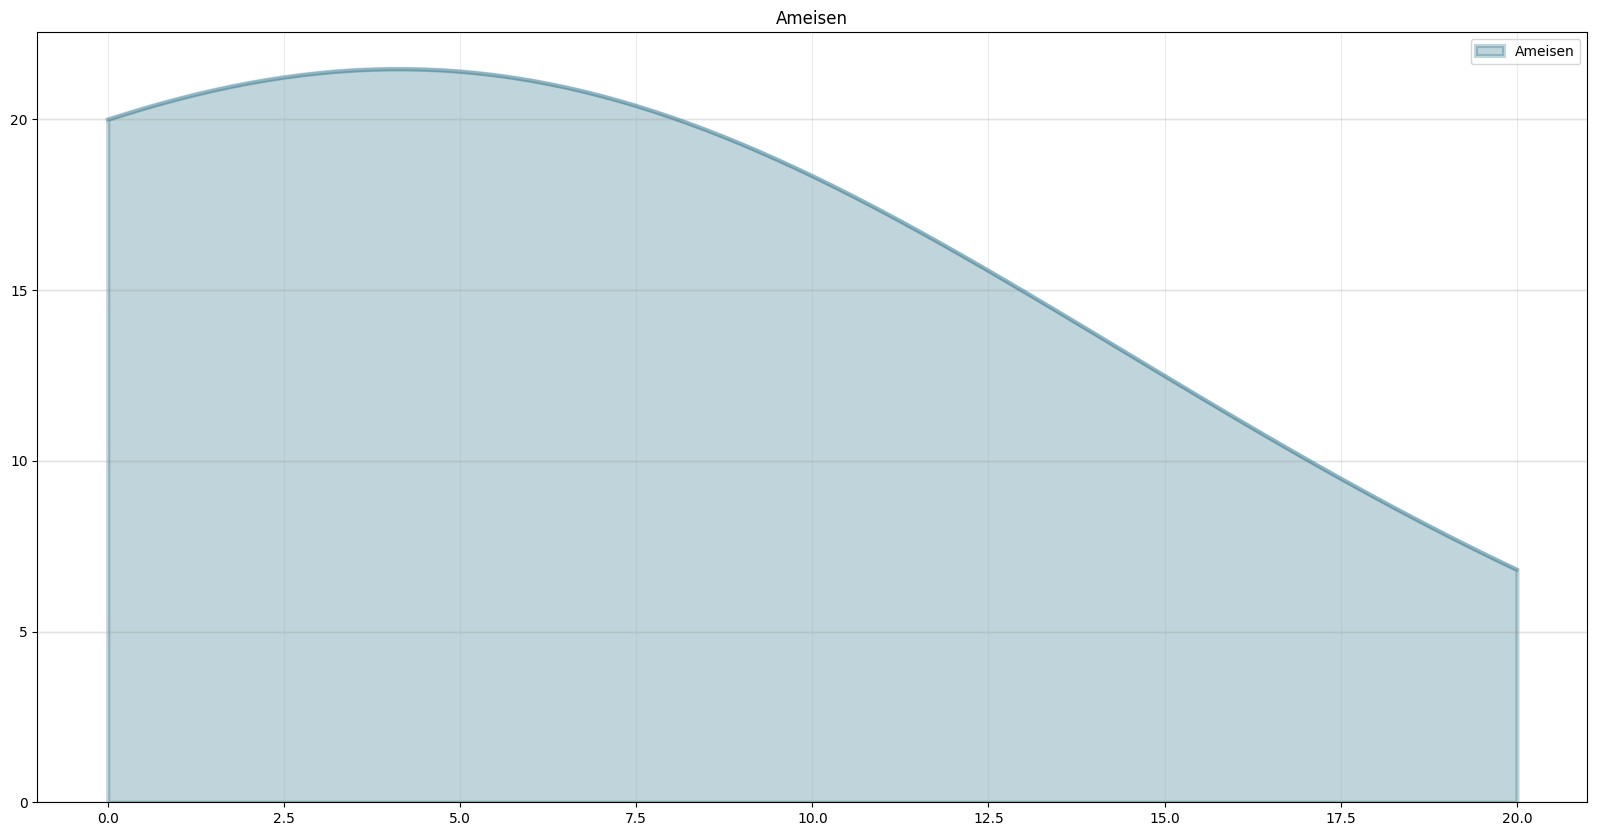

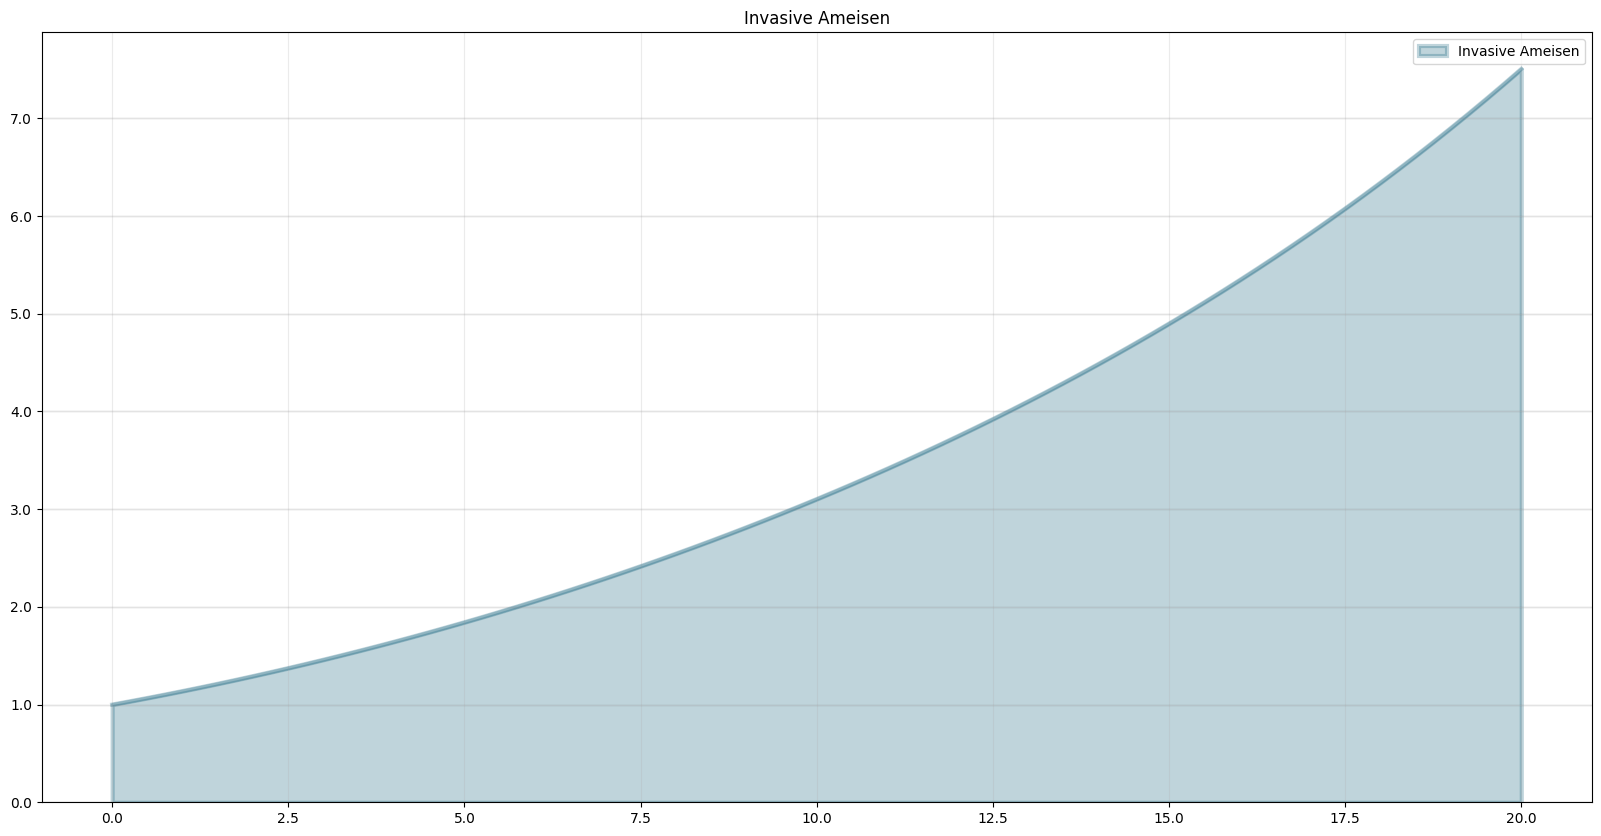

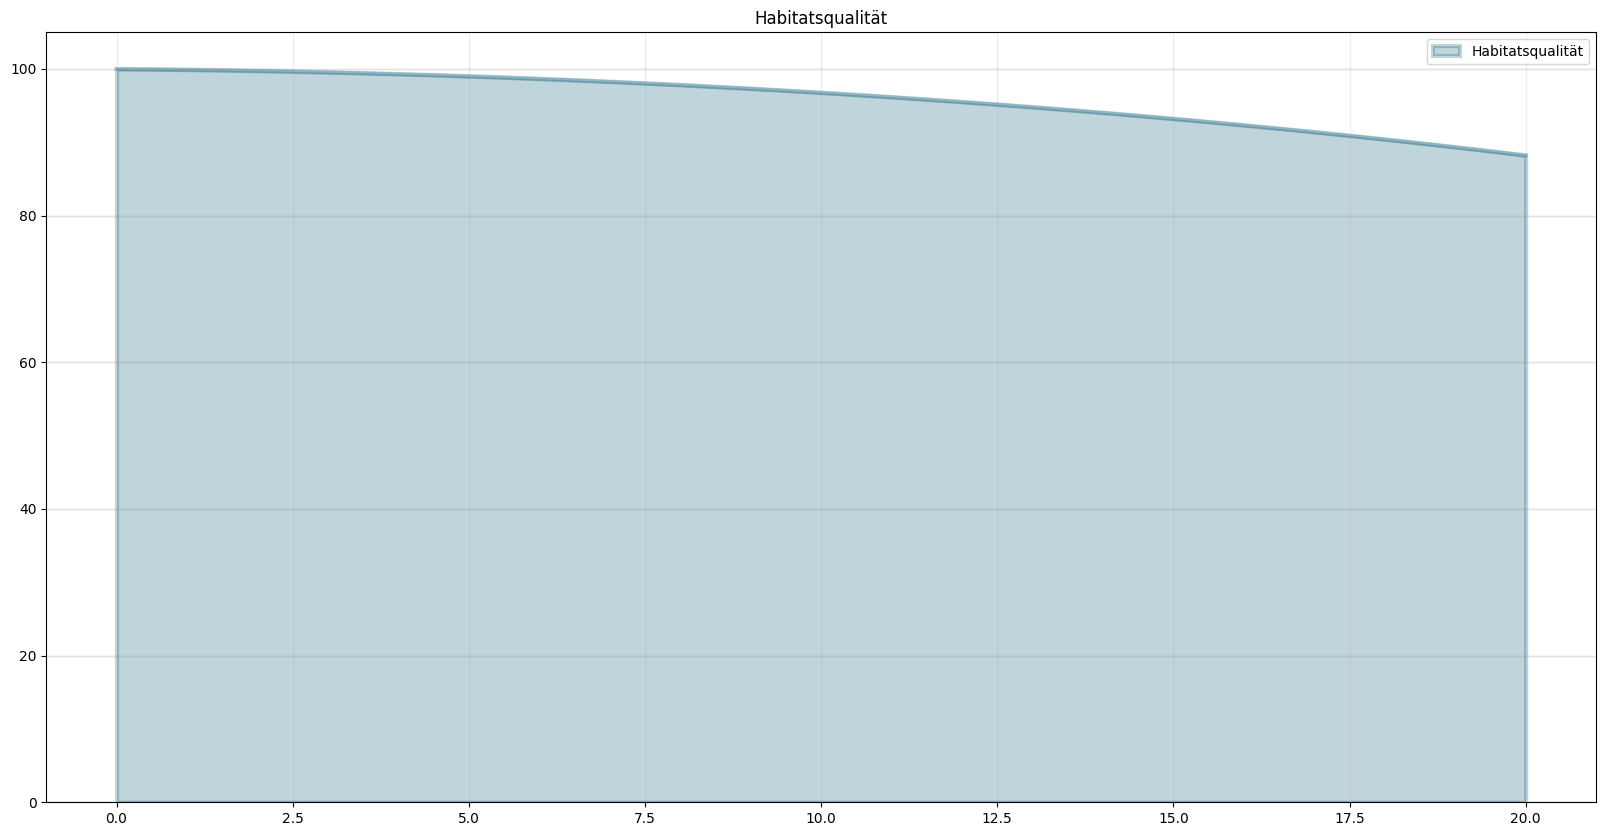

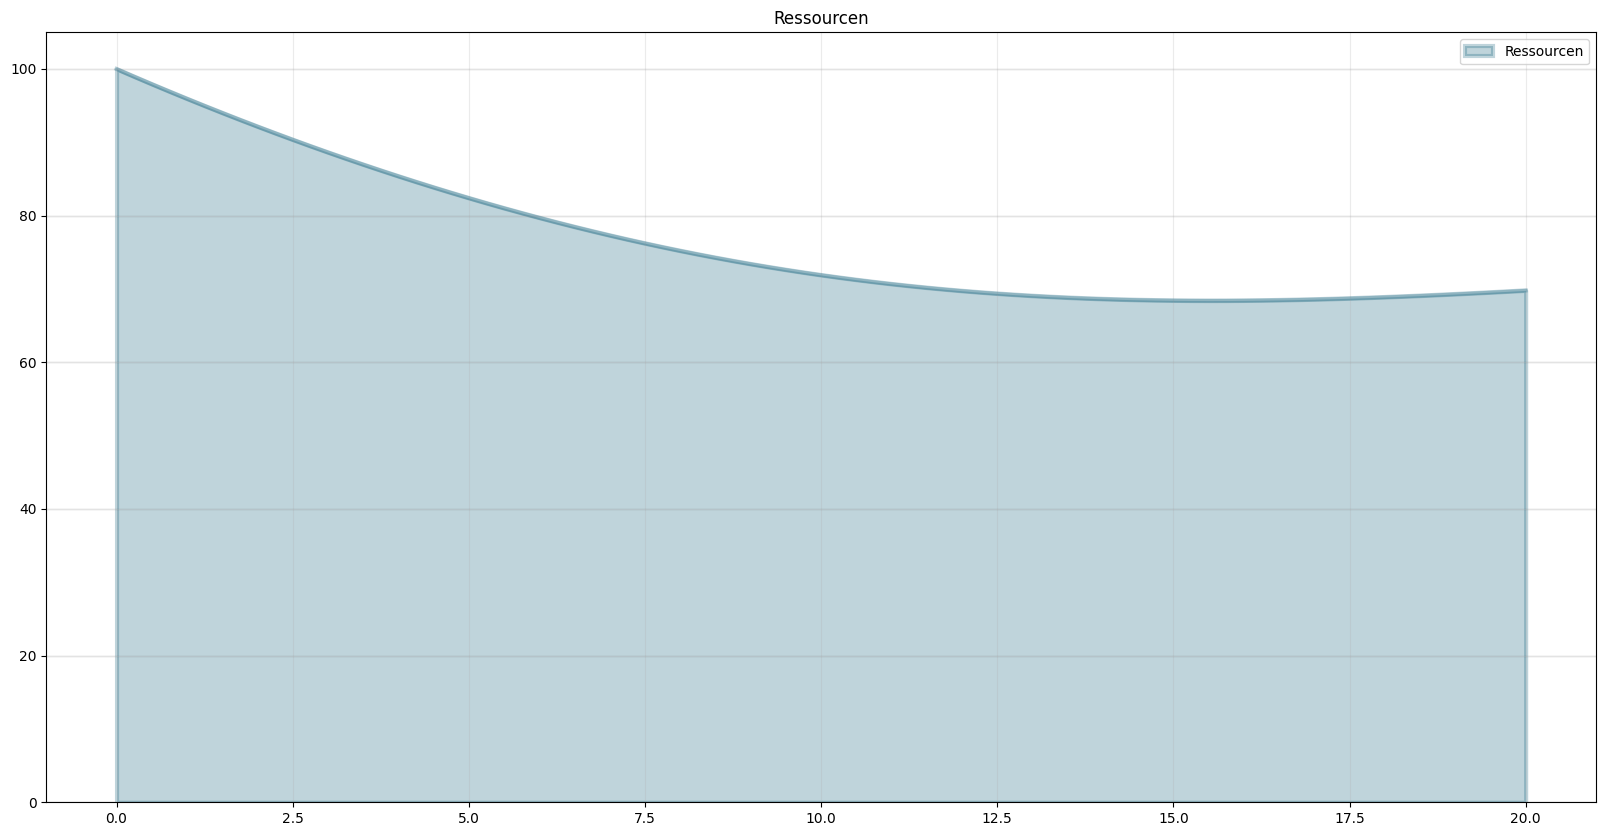

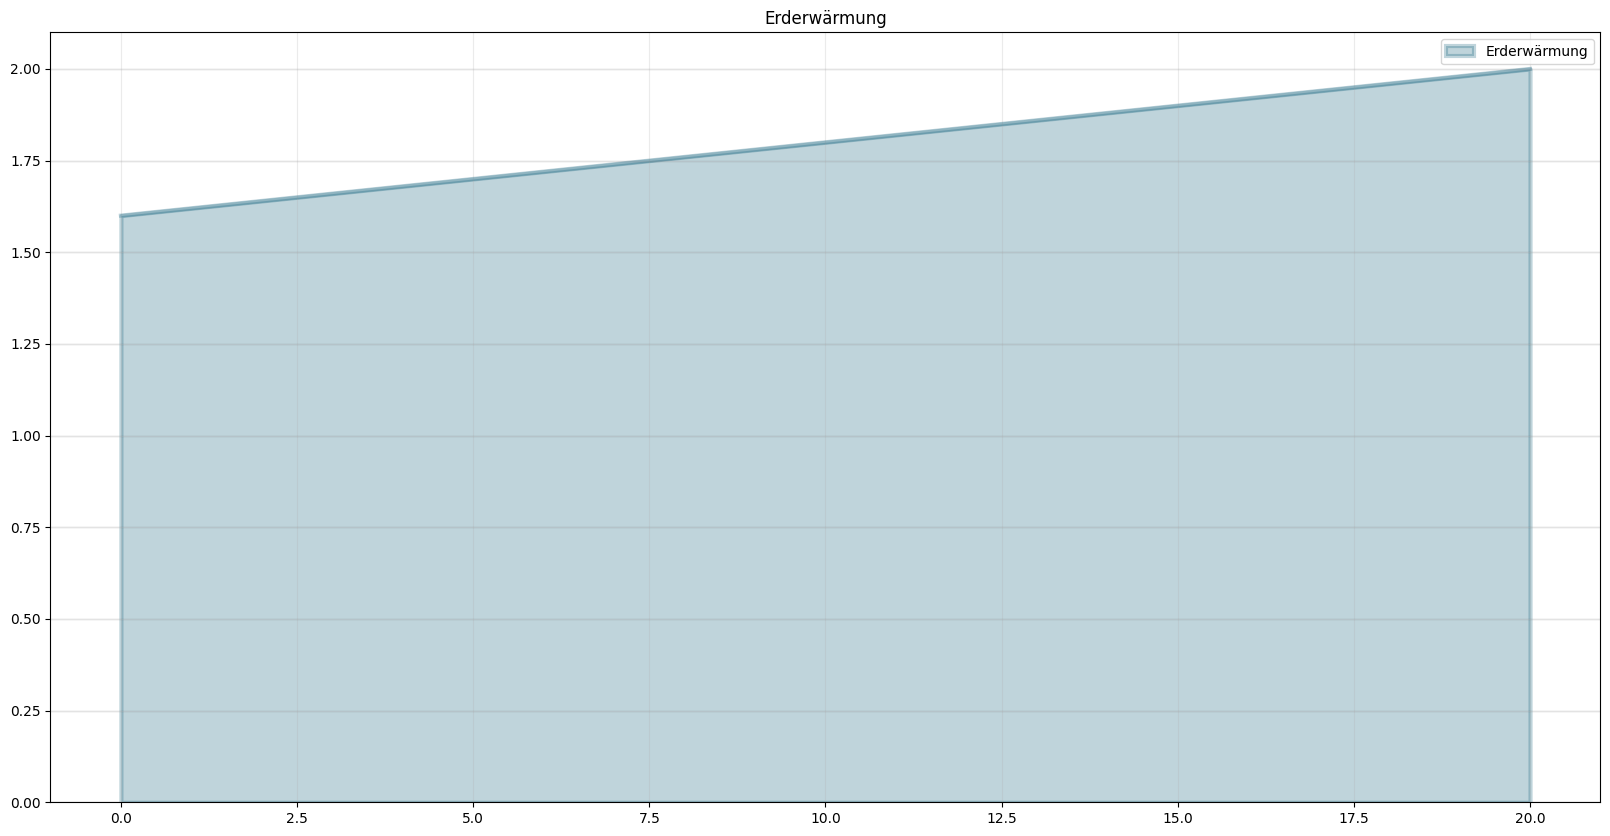

In [7]:
ant_colonies.plot()
invasive.plot()
habitat.plot()
resources.plot()
climate_change.plot()

In [8]:
bptk = bptk()

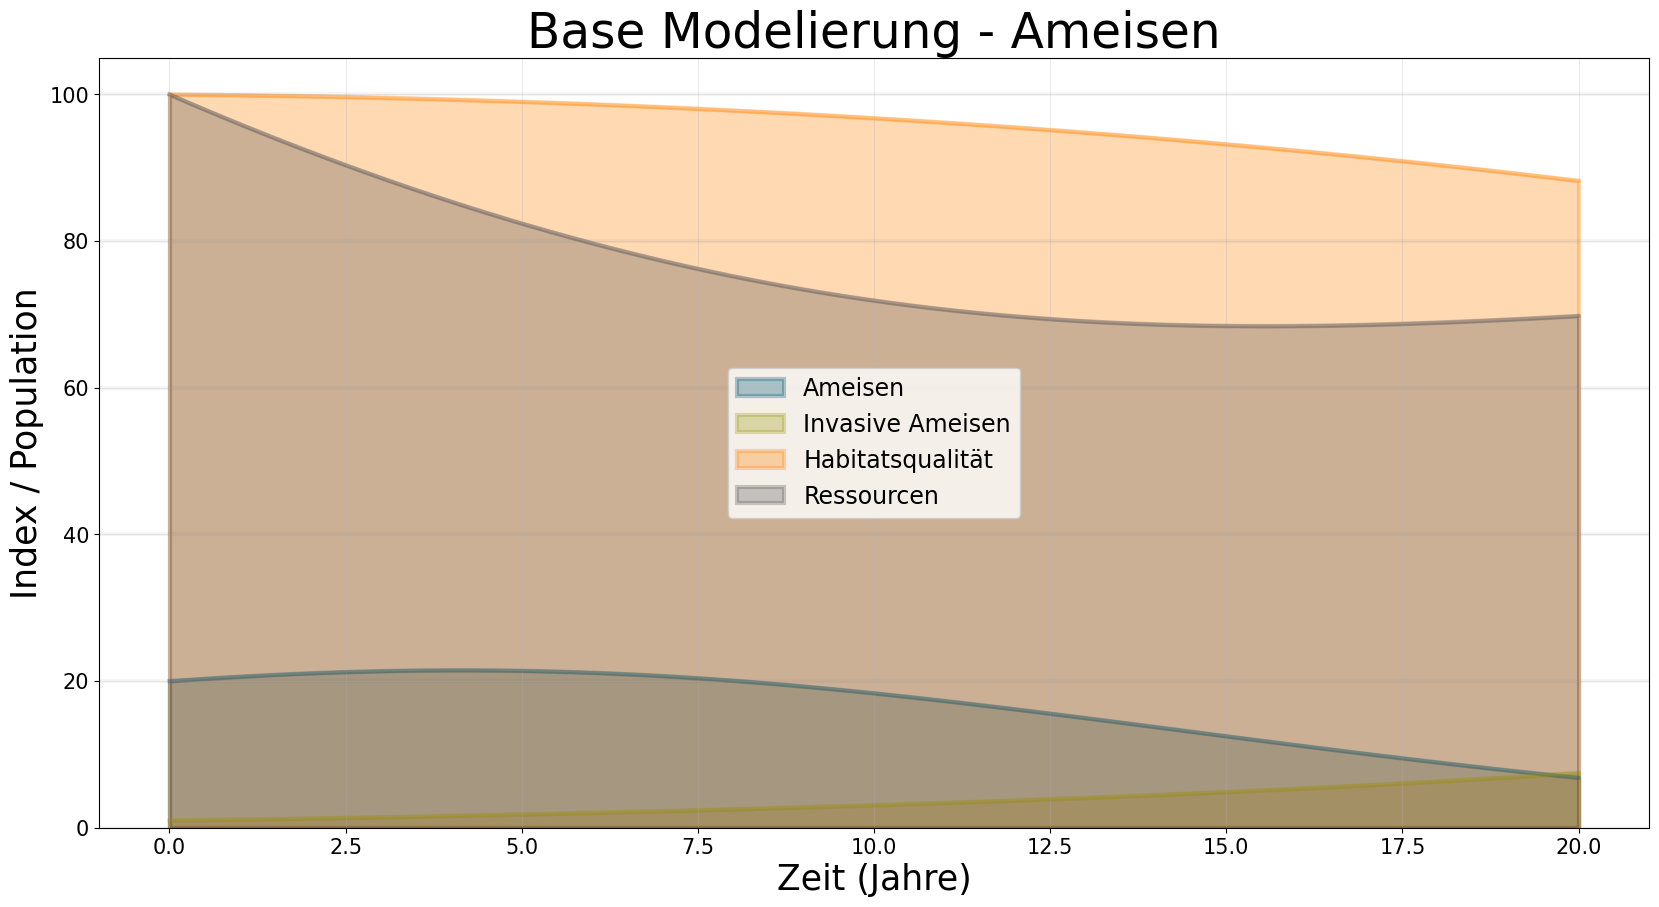

In [9]:
bptk.register_model(model)

bptk.plot_scenarios(
    scenarios="base",
    scenario_managers="smAnts",
    equations=[
        "Ameisen",
        "Invasive Ameisen",
        "Habitatsqualität",
        "Ressourcen"
    ],
    alpha=0.3,
    title="Base Modelierung - Ameisen",
    x_label="Zeit (Jahre)",
    y_label="Index / Population"
)

# LE 4: Szenarien
Verschiedener Szenarien der Veränderung der Erderwärmung im Jahr

In [10]:
scenario_manager = {
    "smAnts":{
        "model": model,
        "base_constants": {
            "ant_colonies": 20.0,
            "invasive": 1.0,
            "habitat": 100.0,
            "resources": 100.0,
            "climate_change": 1.6,
            "climate_change_increase": 0.02
        }
    }
}

bptk.register_scenario_manager(scenario_manager)

In [11]:
# --- LE4: Management-Parameter (damit man 0.4 -> 0.6 per Szenario ändern kann) ---
inv_loss_rate = model.constant("inv_loss_rate")
inv_loss_rate.equation = 0.4

# statt invasive * 0.4 (hart codiert) -> invasive * inv_loss_rate
invasive_loss.equation = invasive * inv_loss_rate


In [12]:
# --- LE4: Klima-Szenarien (Erhöhung pro Jahr) ---
bptk.register_scenarios(
    scenario_manager="smAnts",
    scenarios={
        "Erhöhung_von_0.02C": {"constants": {"Erhöhung pro Jahr": 0.02}},
        "Erhöhung_von_0.04C": {"constants": {"Erhöhung pro Jahr": 0.04}},
        "Erhöhung_von_0.06C": {"constants": {"Erhöhung pro Jahr": 0.06}},
        "Erhöhung_von_0.1C":  {"constants": {"Erhöhung pro Jahr": 0.10}},
    }
)

# --- LE4: Eintragungsdruck (mehr invasive Startkolonien) ---
bptk.register_scenarios(
    scenario_manager="smAnts",
    scenarios={
        "Eintragungsdruck_invasive_init_5": {
            "constants": {
                "invasive": 5.0
            }
        }
    }
)

# --- LE4: Management (höhere Mortalität invasiver Kolonien) ---
bptk.register_scenarios(
    scenario_manager="smAnts",
    scenarios={
        "Management_inv_loss_0.6": {
            "constants": {
                "inv_loss_rate": 0.6
            }
        }
    }
)


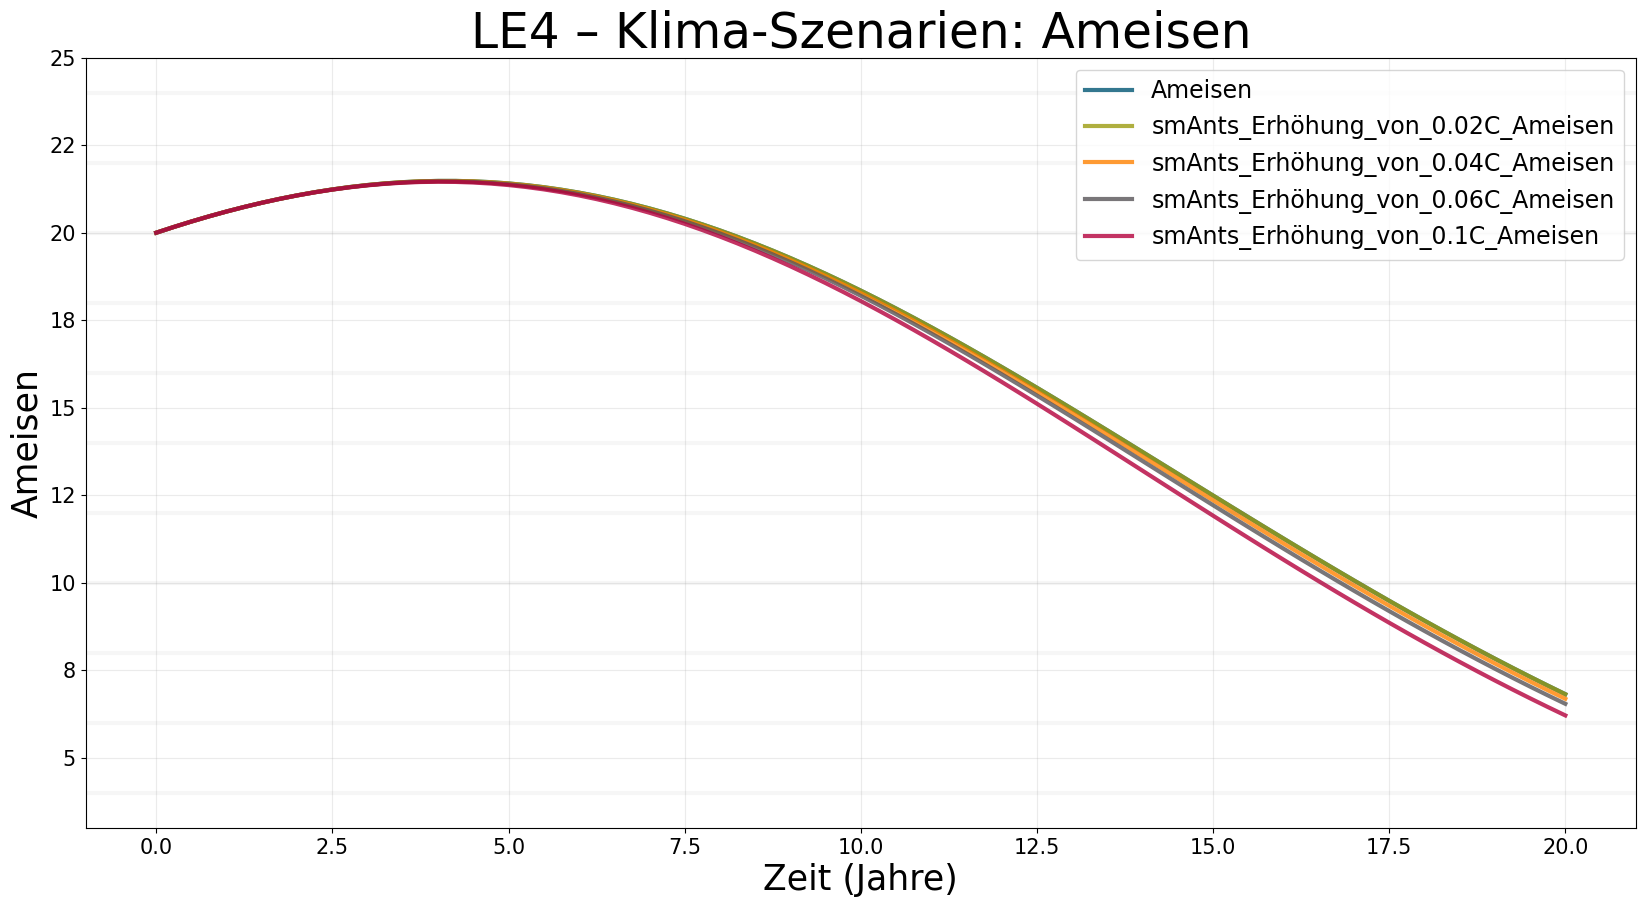

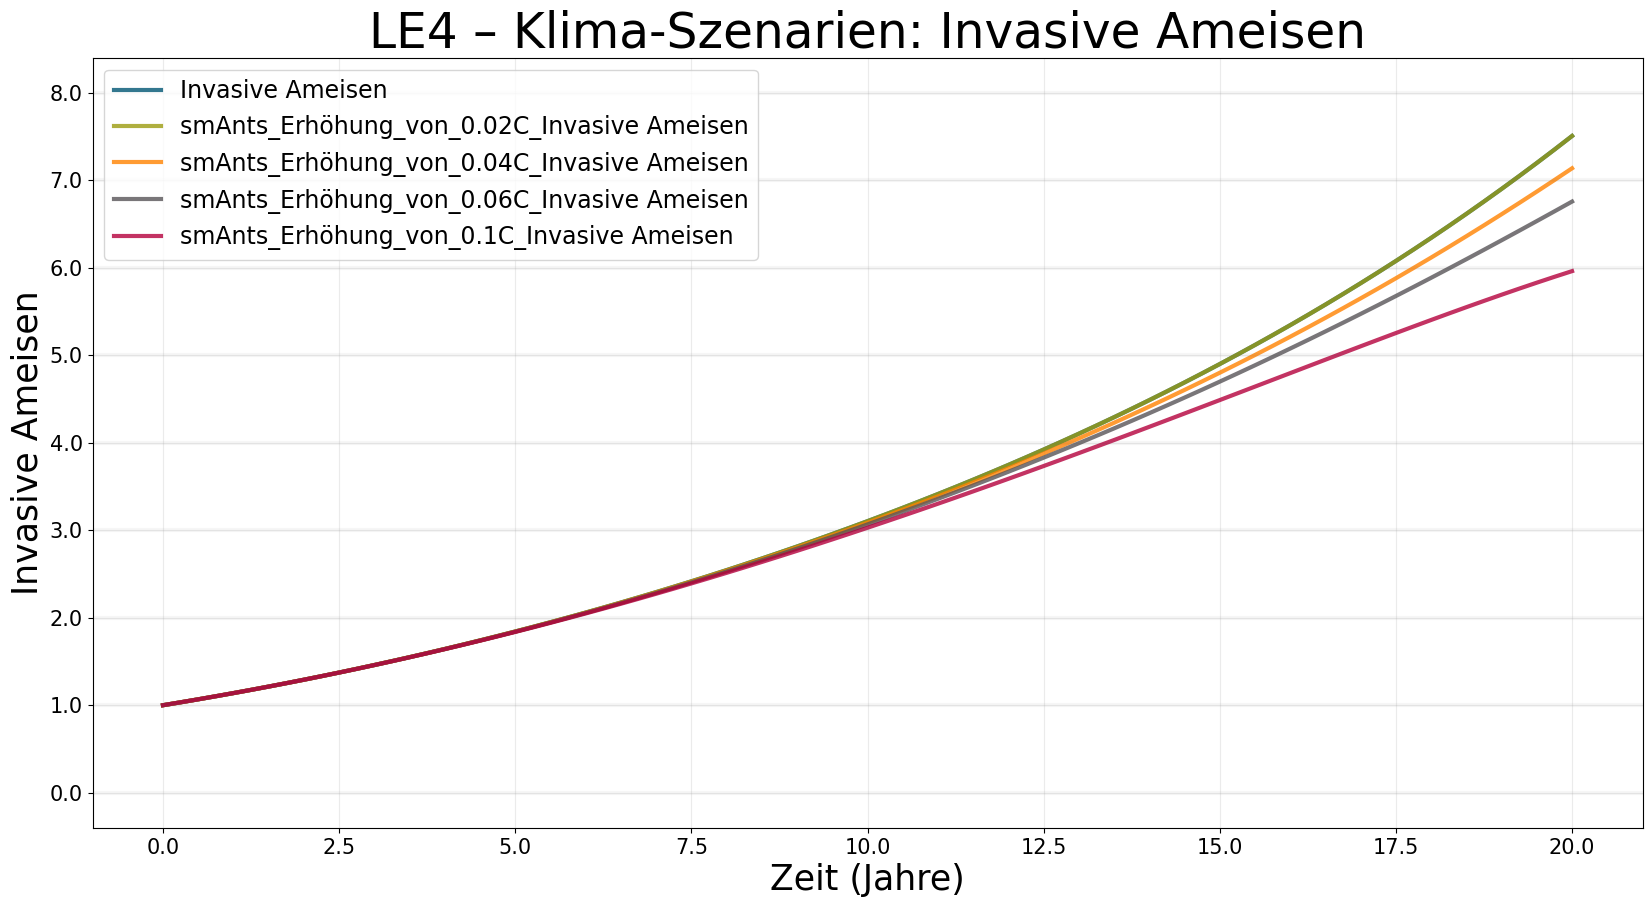

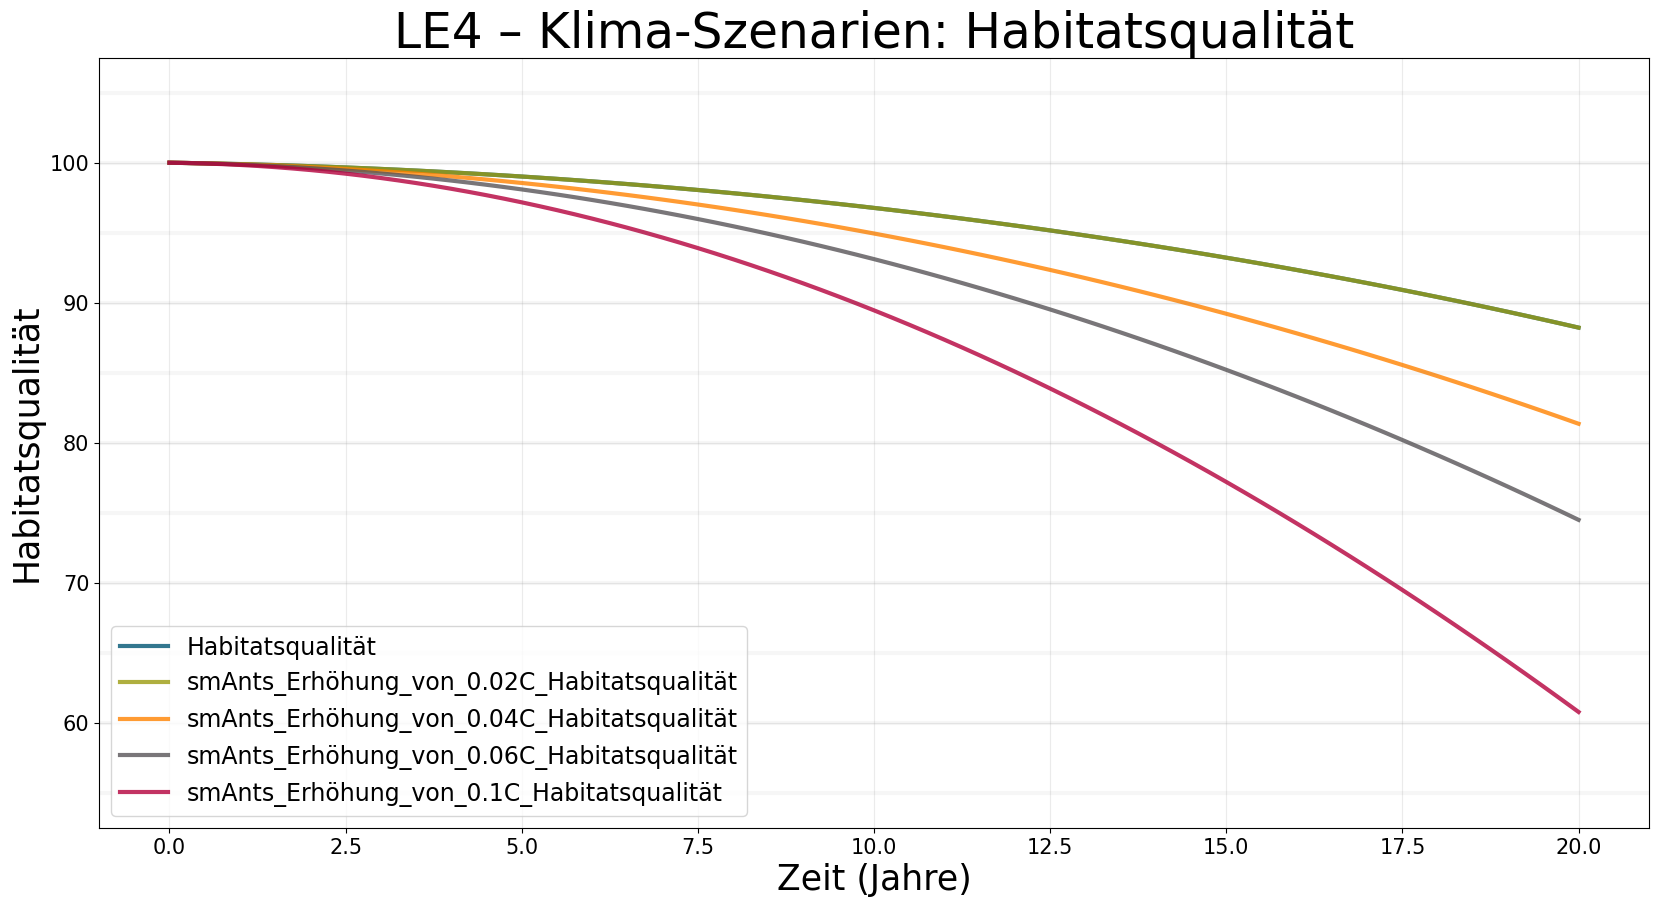

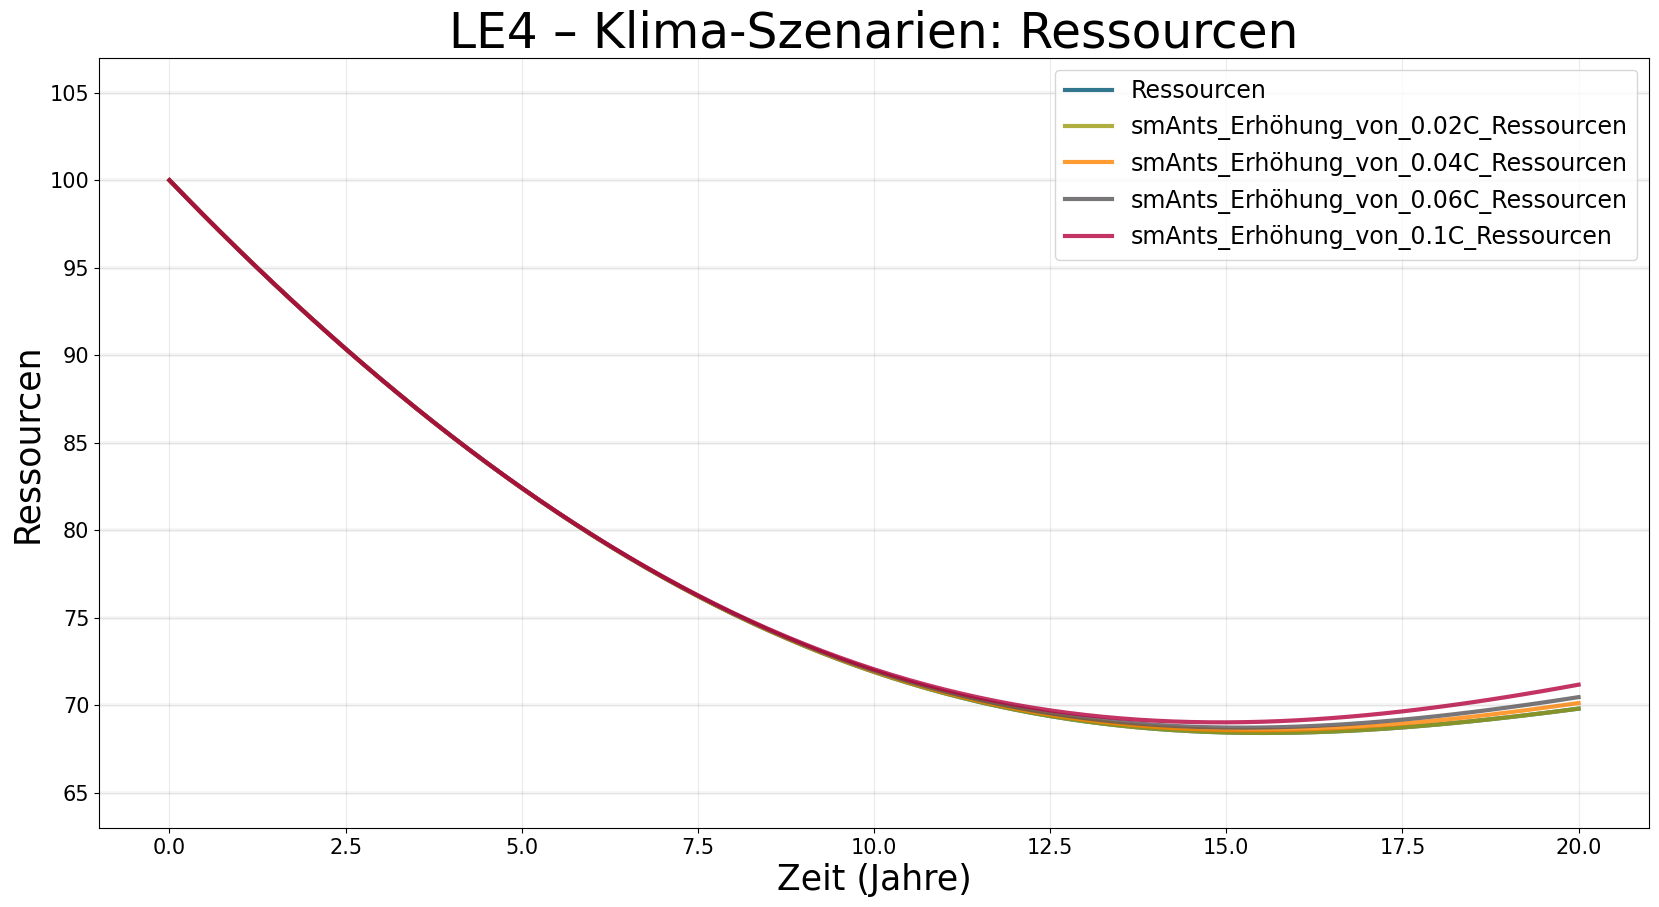

In [13]:
# --- Plot: Klima-Szenarien (nur Erhöhung pro Jahr) ---
climate_scenarios = ["base", "Erhöhung_von_0.02C", "Erhöhung_von_0.04C", "Erhöhung_von_0.06C", "Erhöhung_von_0.1C"]
vars_to_plot = ["Ameisen", "Invasive Ameisen", "Habitatsqualität", "Ressourcen"]

for eq in vars_to_plot:
    bptk.plot_scenarios(
        scenario_managers="smAnts",
        scenarios=climate_scenarios,
        equations=[eq],
        kind="line",
        alpha=0.8,
        title=f"LE4 – Klima-Szenarien: {eq}",
        x_label="Zeit (Jahre)",
        y_label=eq
    )


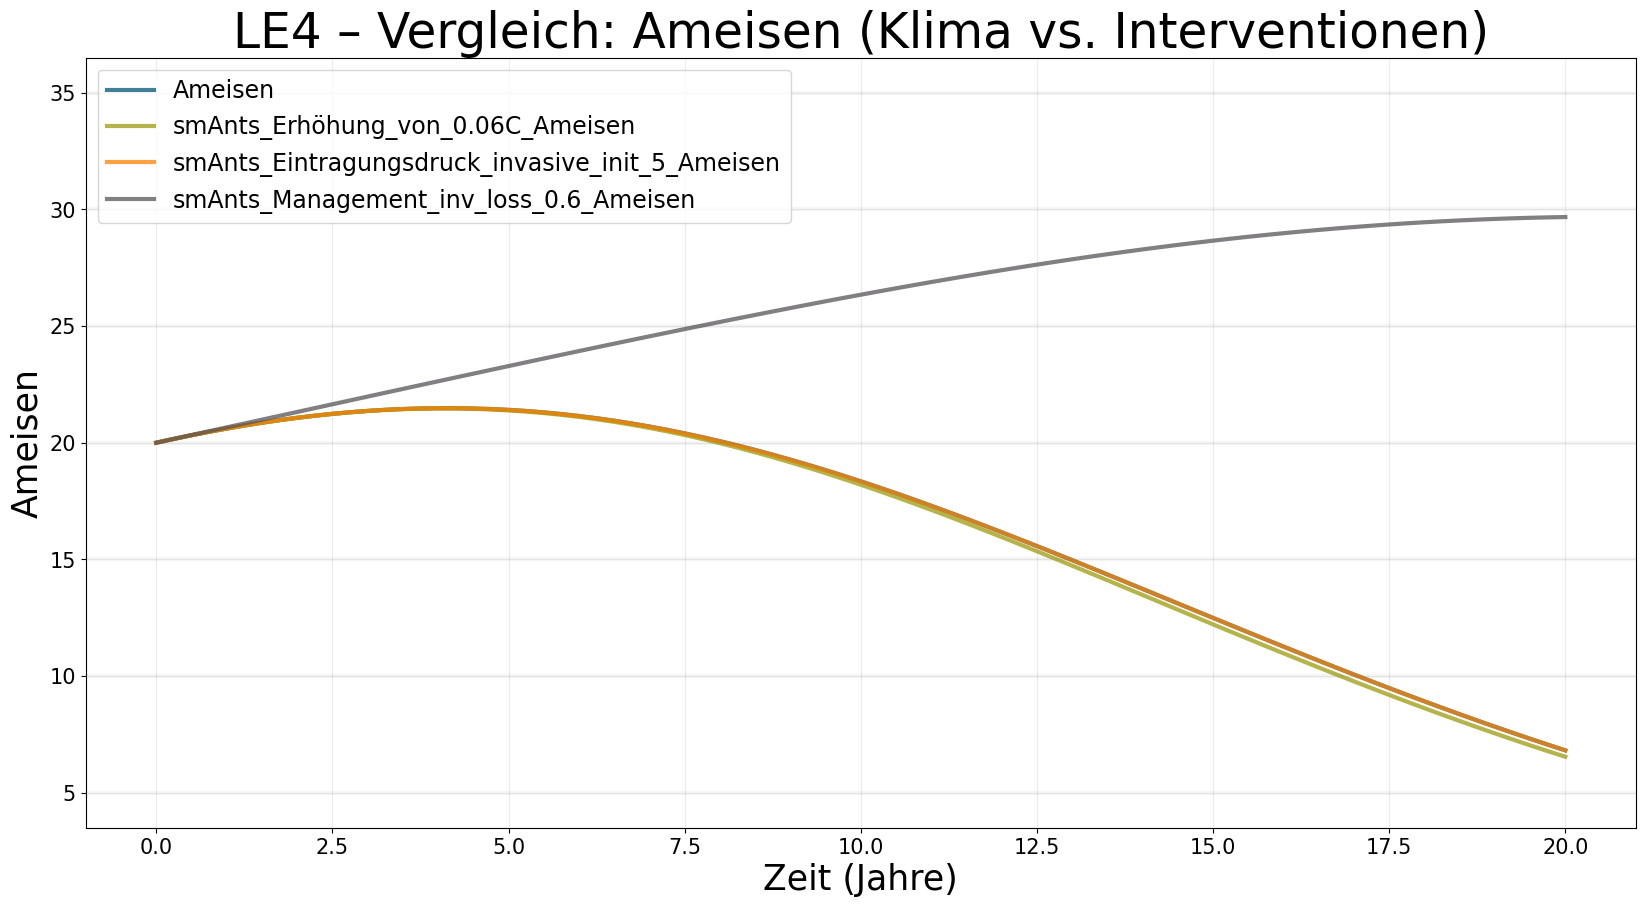

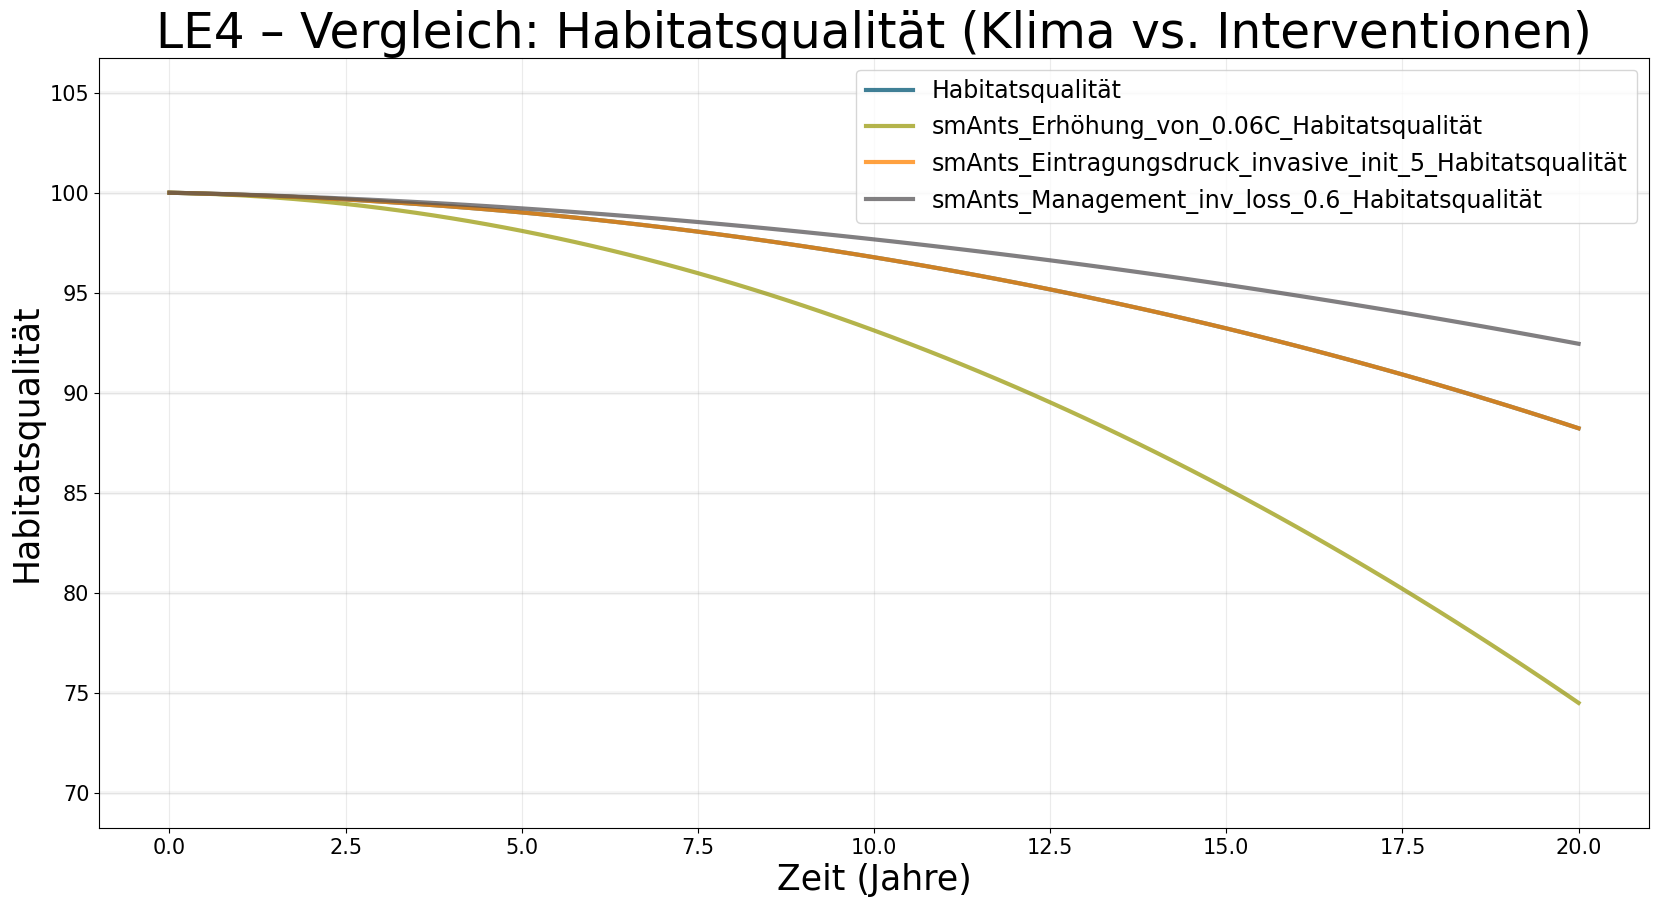

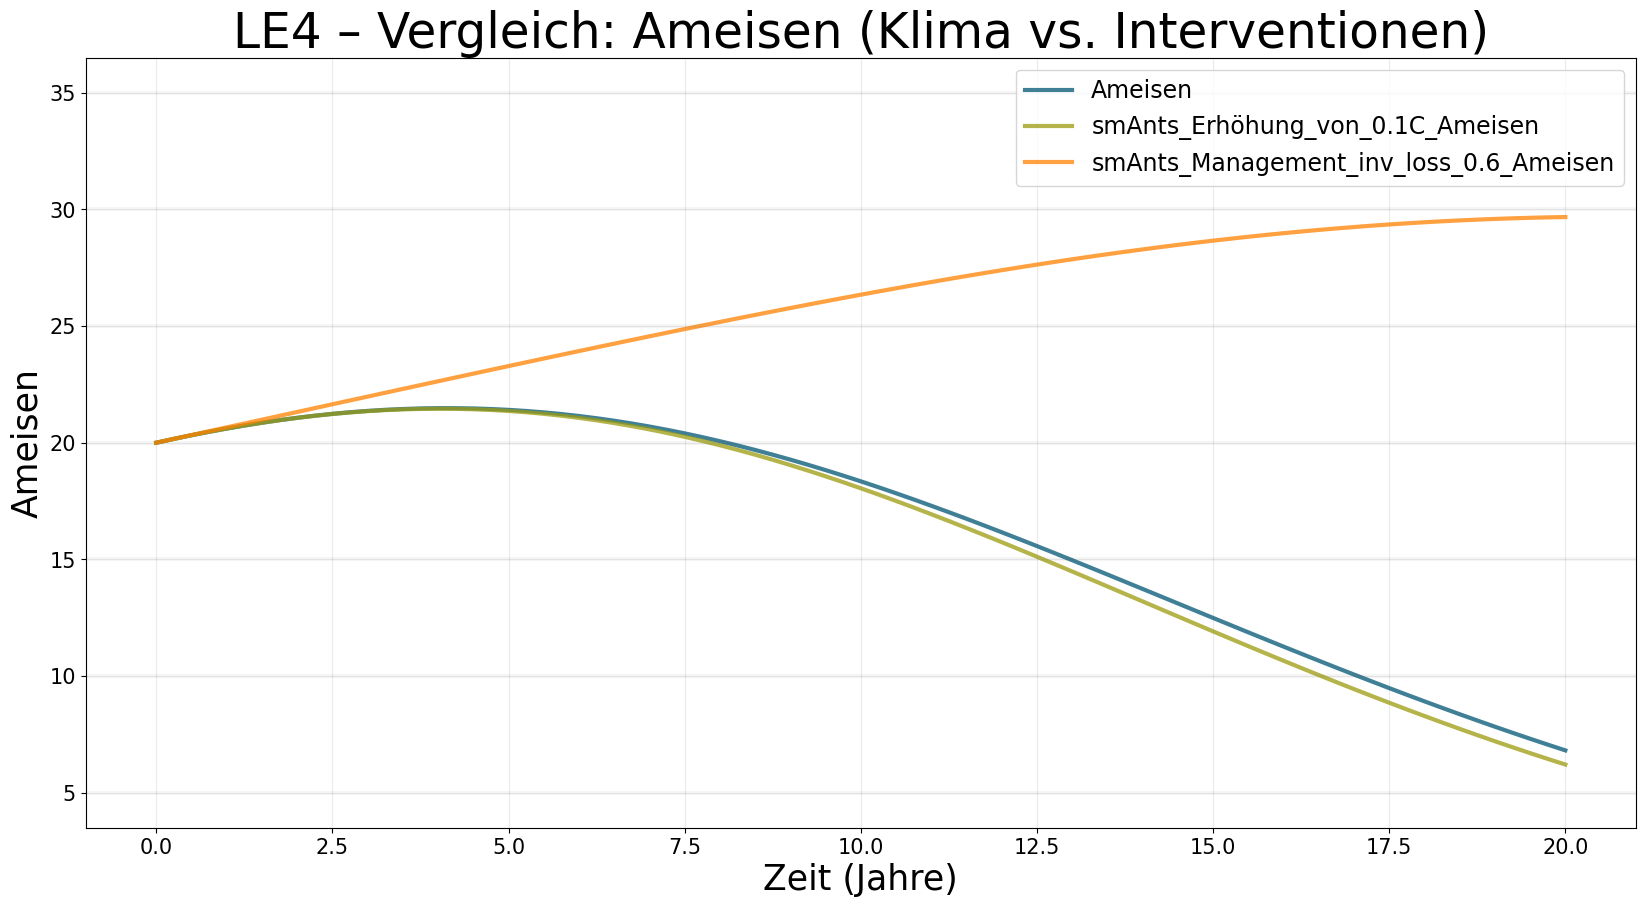

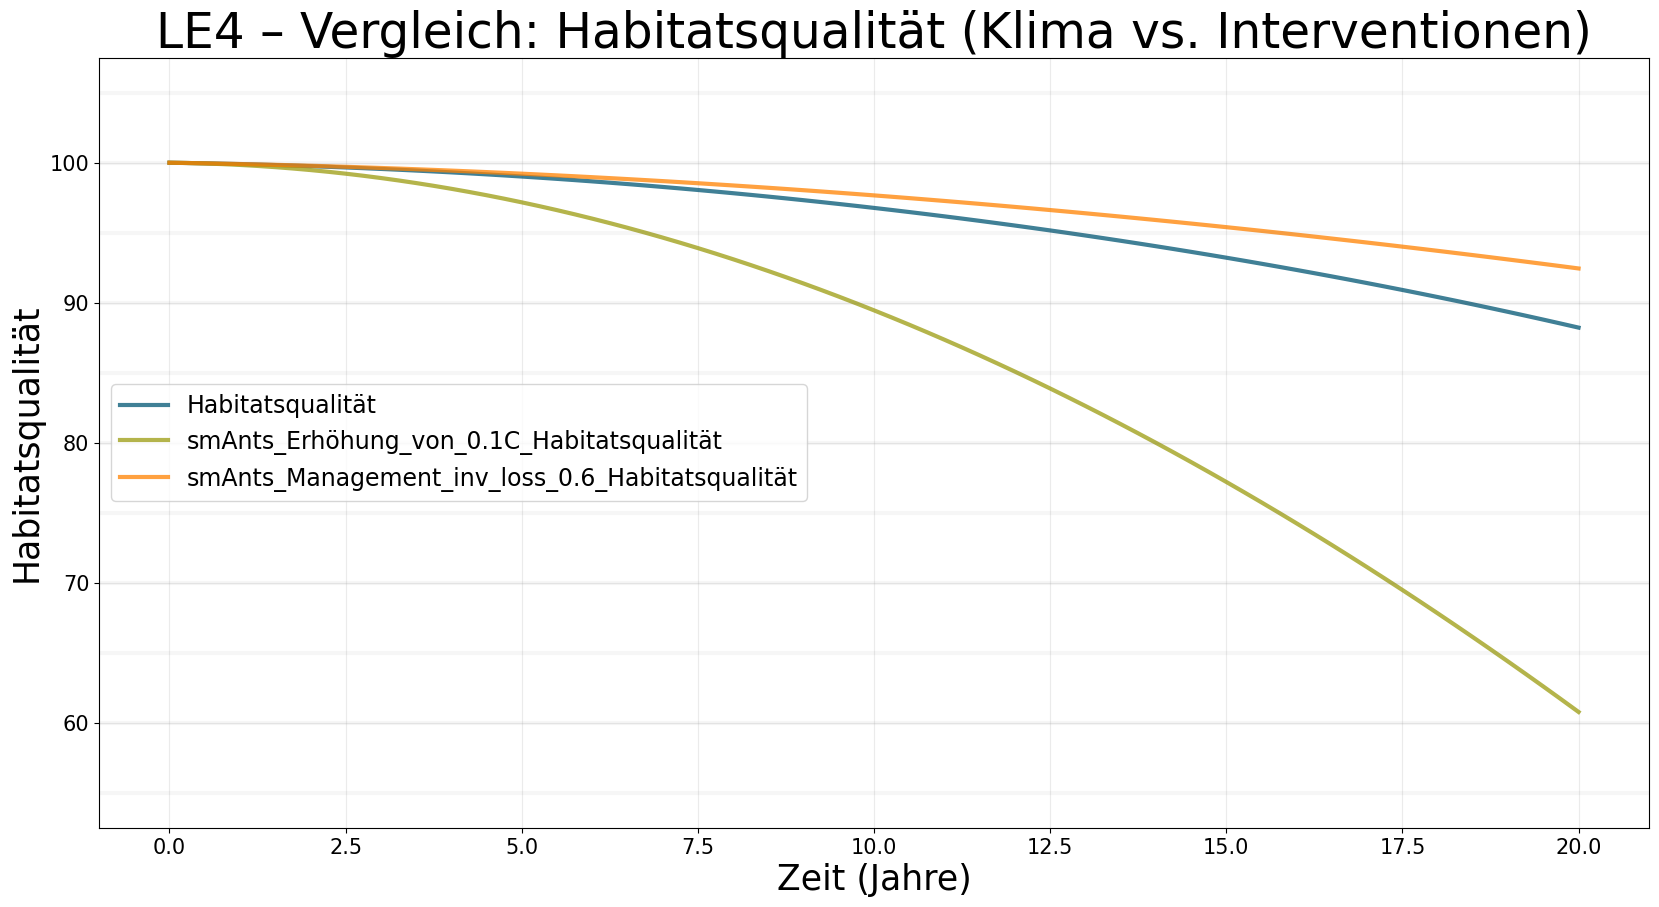

In [14]:
# --- Plot: Interventionen vs Klima (eine Referenz + 2 neue Szenarien) ---
compare_scenarios = [
    "Erhöhung_von_0.06C",
    "Eintragungsdruck_invasive_init_5",
    "Management_inv_loss_0.6",
    "base"  # <- ganz am Schluss, damit die Base-Linie oben liegt
]

compare_scenarios_2 = [
    "Erhöhung_von_0.1C",
    "Management_inv_loss_0.6",
    "base"  # <- ganz am Schluss, damit die Base-Linie oben liegt
]

# Ameisen
bptk.plot_scenarios(
    scenario_managers="smAnts",
    scenarios=compare_scenarios,
    equations=["Ameisen"],
    kind="line",
    alpha=0.75,  # etwas tiefer -> Überlagerungen sieht man besser
    title="LE4 – Vergleich: Ameisen (Klima vs. Interventionen)",
    x_label="Zeit (Jahre)",
    y_label="Ameisen"
)

# Habitat
bptk.plot_scenarios(
    scenario_managers="smAnts",
    scenarios=compare_scenarios,
    equations=["Habitatsqualität"],
    kind="line",
    alpha=0.75,
    title="LE4 – Vergleich: Habitatsqualität (Klima vs. Interventionen)",
    x_label="Zeit (Jahre)",
    y_label="Habitatsqualität"
)

# Ameisen
bptk.plot_scenarios(
    scenario_managers="smAnts",
    scenarios=compare_scenarios_2,
    equations=["Ameisen"],
    kind="line",
    alpha=0.75,  # etwas tiefer -> Überlagerungen sieht man besser
    title="LE4 – Vergleich: Ameisen (Klima vs. Interventionen)",
    x_label="Zeit (Jahre)",
    y_label="Ameisen"
)

# Habitat
bptk.plot_scenarios(
    scenario_managers="smAnts",
    scenarios=compare_scenarios_2,
    equations=["Habitatsqualität"],
    kind="line",
    alpha=0.75,
    title="LE4 – Vergleich: Habitatsqualität (Klima vs. Interventionen)",
    x_label="Zeit (Jahre)",
    y_label="Habitatsqualität"
)